<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/regresion_multiple_arizona_houses_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuente de datos: **[Arizona Houses 2021](https://www.kaggle.com/datasets/antoniong203/arizona-houses-2021)**, Kaggle

El conjunto de datos contiene casas de Arizona que se han listado anteriormente y algunas de sus características e información.

# Paso 1: Cargar el conjunto de datos y explorarlo

In [ ]:
# Importar pandas
import pandas as pd

# Cargar el conjunto de datos
data_multi = pd.read_csv('/content/drive/MyDrive/AZhousingData.csv')

# Mostrar las primeras filas del conjunto de datos
data_multi.head()

,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...


Ahora que hemos cargado el conjunto de datos, procedemos a preparar los datos y a entrenar un modelo de regresión lineal múltiple. Empezamos seleccionando las variables '**sqft**' (superficie), '**beds**' (habitaciones) y '**baths**' (baños) como variables independientes y '**Price**' como variable dependiente. Luego, dividiremos los datos en conjuntos de entrenamiento y prueba.

# Paso 2: Preparar los datos: seleccionar las variables

In [ ]:
# Importar el train_test_split
from sklearn.model_selection import train_test_split

# Definir las variables independiente (X_multi) y dependiente (y_multi)
X_multi = data_multi[['sqft', 'beds', 'baths']]
y_multi = data_multi['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

X_train_multi.shape, X_test_multi.shape

((450, 3), (113, 3))

Hemos dividido el conjunto de datos en dos partes: un conjunto de entrenamiento con 450 ejemplos y un conjunto de prueba con 113 ejemplos.

# Paso 3: Entrenar un modelo de regresión lineal múltiple utilizando el conjunto de entrenamiento

Ahora, procedemos a entrenar un modelo de regresión lineal múltiple utilizando las variables '**sqft**' (superficie), '**beds**' (habitaciones) y '**baths**' (baños) como predictores.

In [ ]:
# Importando LinearRegression
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal múltiple
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Coeficientes del modelo
coefficients = model_multi.coef_
intercept_multi = model_multi.intercept_

coefficients, intercept_multi

(array([   360.27644345, -76304.76986854,  30716.84004831]),
 -55832.73935353925)

El modelo de regresión lineal múltiple que hemos entrenado tiene la siguiente ecuación:  

$Precio = 360.28 × sqft − 76,304.77 × beds + 30,716.84 × baths − 55,832.74$  

* Precio es el precio de la vivienda.
* sqft es el área de la vivienda en pies cuadrados.
* beds es el número de habitaciones.
* baths es el número de baños.

#Paso 4: Evaluar el rendimiento del modelo en el conjunto de prueba

Evaluamos el rendimiento del modelo en el conjunto de prueba utilizando el error cuadrático medio (MSE) como métrica de evaluación.

In [ ]:
# Importando mean_squared_error y numpy
from sklearn.metrics import mean_squared_error
import numpy as np

# Predecir los precios en el conjunto de prueba
y_pred_multi = model_multi.predict(X_test_multi)

# Calcular nuevamente el error cuadrático medio (MSE)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)

# Calcular nuevamente la raíz cuadrada del error cuadrático medio (RMSE)
rmse_multi = np.sqrt(mse_multi)

mse_multi, rmse_multi

(1534479293620.2666, 1238741.0115194647)

El error cuadrático medio (MSE) para la regresión lineal múltiple en el conjunto de prueba es aproximadamente $1.534 × 10^12$. El error cuadrático medio raíz (RMSE) es aproximadamente $1,238,741.01, lo que indica que, en promedio, nuestras predicciones se desvían del valor real por aproximadamente 1.24 millones de dólares.

# Paso 5: Visualizar los resultados con una gráfica

A continuación, visualizaremos los resultados reales frente a las predicciones en una gráfica. Dado que estamos trabajando con múltiples variables independientes, una gráfica de dispersión 2D no es suficiente para representar todas las dimensiones. Sin embargo, podemos visualizar los precios reales frente a los precios predichos para obtener una idea de cuán cerca están nuestras predicciones de los valores reales.

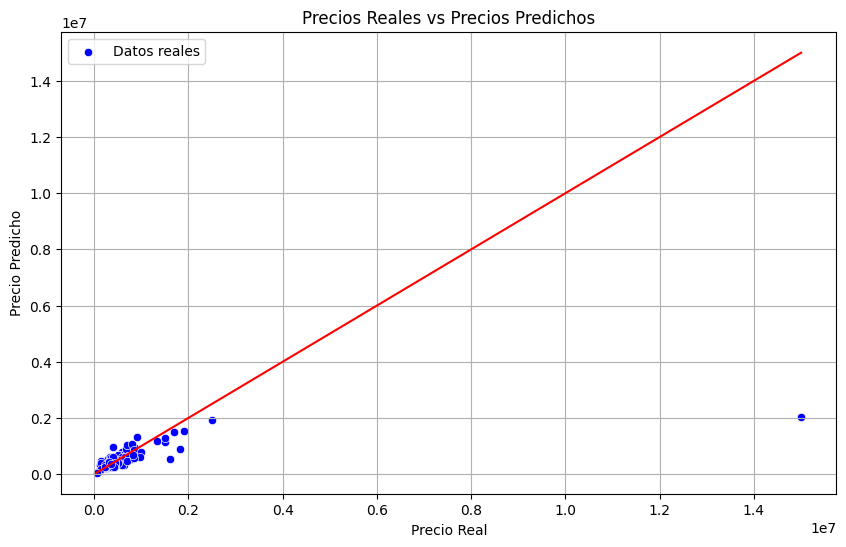

In [ ]:
# Importando pyplot y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfica de dispersión comparando precios reales con precios predichos
sns.scatterplot(x=y_test_multi, y=y_pred_multi, color='blue', label='Datos reales')

# Línea diagonal para referencia
plt.plot([min(y_test_multi), max(y_test_multi)], [min(y_test_multi), max(y_test_multi)], color='red')

# Títulos y etiquetas
plt.title('Precios Reales vs Precios Predichos')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.grid(True)

plt.show()

Gráfica que compara los precios reales con los precios predichos por el modelo. Los puntos azules representan las viviendas, donde el eje **$x$** muestra el precio real y el eje $y$ muestra el precio predicho por el modelo. La línea roja diagonal es una línea de referencia que representa una predicción perfecta.  

Idealmente, todos los puntos deberían estar cerca de esta línea roja, lo que indicaría que las predicciones del modelo son cercanas a los valores reales. Como puedes observar, hay cierta dispersión en los puntos, lo que indica que hay un margen de error en las predicciones. Sin embargo, en general, parece que el modelo ha capturado una tendencia general en los datos.  

Debemos recordar que siempre hay margen de mejora, y podriamos considerar otros factores o utilizar modelos más complejos para mejorar las predicciones en el futuro.